#  Analysis of the effectiveness of advertising channels and marketing campaigns.

## Description:
We launch advertising through Facebook, Google Ads and Instagram. We need to find out which promotion channels bring in the most sales, what is the cost of customer acquisition (CAC) and the return on investment (ROI) of advertising.

### Tasks:
1) Upload and clean data.
2) Calculate CAC, ROI, average conversion for each channel.
3) Determine which campaigns are generating the most profit.
4) Conduct A/B testing of profitability across campaign types and channels.
5) Identify the impact of target audience on acquasation cost.
6) Analysis of the time dynamics of advertising indicators:
    - How CAC, ROI, conversions by channel and campaign change over time (weekly or monthly)?
    - Is there seasonality?
7) Segmenting campaigns by performance:
    - Dividing campaigns into groups: “effective”, “average”, “ineffective” by KPI.
8) Report and recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Upload and clean data.

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\marketing_campaign_dataset.csv")
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [4]:
# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Convert the Duration and Acquisition_Cost columns to numeric format
df['Duration'] = df['Duration'].apply(lambda x: x.split(' ')[0]).astype('int64')
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df = df.rename(columns={'Duration': 'Duration(D)', 'Acquisition_Cost': 'Acquisition_Cost($)'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Campaign_ID          200000 non-null  int64         
 1   Company              200000 non-null  object        
 2   Campaign_Type        200000 non-null  object        
 3   Target_Audience      200000 non-null  object        
 4   Duration(D)          200000 non-null  int64         
 5   Channel_Used         200000 non-null  object        
 6   Conversion_Rate      200000 non-null  float64       
 7   Acquisition_Cost($)  200000 non-null  float64       
 8   ROI                  200000 non-null  float64       
 9   Location             200000 non-null  object        
 10  Language             200000 non-null  object        
 11  Clicks               200000 non-null  int64         
 12  Impressions          200000 non-null  int64         
 13  Engagement_Sco

In [8]:
df.isnull().sum()

Campaign_ID            0
Company                0
Campaign_Type          0
Target_Audience        0
Duration(D)            0
Channel_Used           0
Conversion_Rate        0
Acquisition_Cost($)    0
ROI                    0
Location               0
Language               0
Clicks                 0
Impressions            0
Engagement_Score       0
Customer_Segment       0
Date                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Campaign_ID,Duration(D),Conversion_Rate,Acquisition_Cost($),ROI,Clicks,Impressions,Engagement_Score,Date
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710,2021-07-01 23:35:09.600000
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000,2021-04-02 00:00:00
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000,2021-07-02 00:00:00
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000,2021-10-01 00:00:00
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581,NaN


In [11]:
# Checking and removing outliers
numerical_columns = df[['Duration(D)', 'Conversion_Rate', 'Acquisition_Cost($)', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']]
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    outlers = ((df[col]<lower_bound)| (df[col]>upper_bound)).sum()
    print(f'Column outliers {col}: {outlers}')

Column outliers Duration(D): 0
Column outliers Conversion_Rate: 0
Column outliers Acquisition_Cost($): 0
Column outliers ROI: 0
Column outliers Clicks: 0
Column outliers Impressions: 0
Column outliers Engagement_Score: 0


#### 2) Calculate CAC, ROI, average conversion for each channel.

In [12]:
summary = df.groupby('Channel_Used').agg({'Acquisition_Cost($)': 'mean',
                                         'ROI': 'mean',
                                         'Conversion_Rate': 'mean',
                                         'Campaign_ID': 'count'}).rename(columns={'Campaign_ID': 'Num_Campaigns'})
summary.head(10)

,Acquisition_Cost($),ROI,Conversion_Rate,Num_Campaigns
Channel_Used,,,,
Email,12526.387809,4.996487,0.080282,33599
Facebook,12510.900942,5.018699,0.079992,32819
Google Ads,12528.031401,5.003141,0.080183,33438
Instagram,12491.760002,4.988706,0.079886,33392
Website,12487.814748,5.014167,0.080183,33360
YouTube,12481.390213,4.993754,0.079889,33392


#### 3) Determine which campaigns are generating the most profit.

In [13]:
df['Profit'] = df['Acquisition_Cost($)']*df['ROI']
campaign_profit = df.groupby(['Campaign_ID', 'Campaign_Type'])['Profit'].sum().sort_values(ascending=False).head(10)
campaign_profit.head(10)

Campaign_ID  Campaign_Type
13019        Influencer       159456.36
33606        Email            159368.58
72530        Display          159360.00
13708        Display          159352.62
73095        Influencer       159352.18
8281         Social Media     159328.68
163709       Display          159248.69
11708        Display          159073.32
172561       Search           158809.96
70216        Influencer       158672.96
Name: Profit, dtype: float64

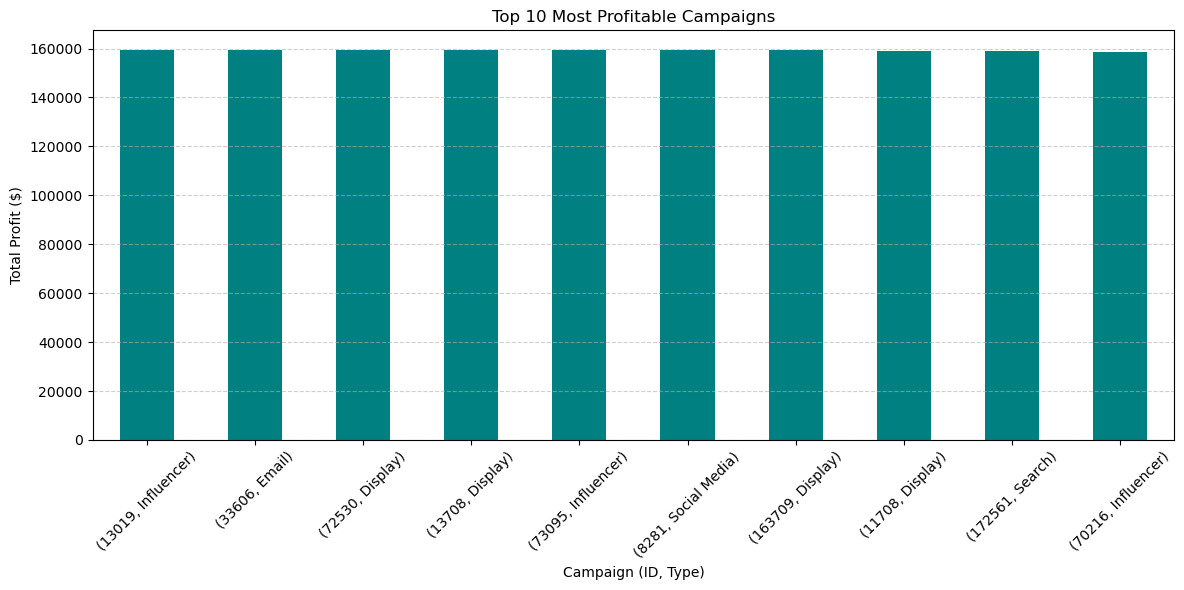

In [14]:
# Visualization
plt.figure(figsize=(12,6))
campaign_profit.plot(kind='bar', color='teal')
plt.title('Top 10 Most Profitable Campaigns')
plt.ylabel('Total Profit ($)')
plt.xlabel('Campaign (ID, Type)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 4) Conduct A/B testing of profitability across campaign types and channels.

In [15]:
# Conduct an A/B test using ANOVA
from scipy.stats import f_oneway

# Grouping by Campaign_Type
groups = [group['Profit'].dropna() for _, group in df.groupby('Campaign_Type')]

f_stat, p_value = f_oneway(*groups)
print(f'ANOVA by Campaign_Type: F = {f_stat:.2f}, p = {p_value:.4f}')

ANOVA by Campaign_Type: F = 0.41, p = 0.8031


In [16]:
# Grouping by Channel_Used
groups = [group['Profit'].dropna() for _, group in df.groupby('Channel_Used')]

f_stat, p_value = f_oneway(*groups)
print(f'ANOVA by Channel_Used: F = {f_stat:.2f}, p = {p_value:.4f}')

ANOVA by Channel_Used: F = 1.53, p = 0.1776


#### 5) Identify the impact of target audience on acquasation cost.

In [17]:
# Average cost by target audience
audience_cost = df.groupby(['Target_Audience'])['Acquisition_Cost($)'].mean().sort_values()

C:\Users\User\AppData\Local\Temp\ipykernel_8404\3476315133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=audience_cost.index, y=audience_cost.values, palette='viridis')


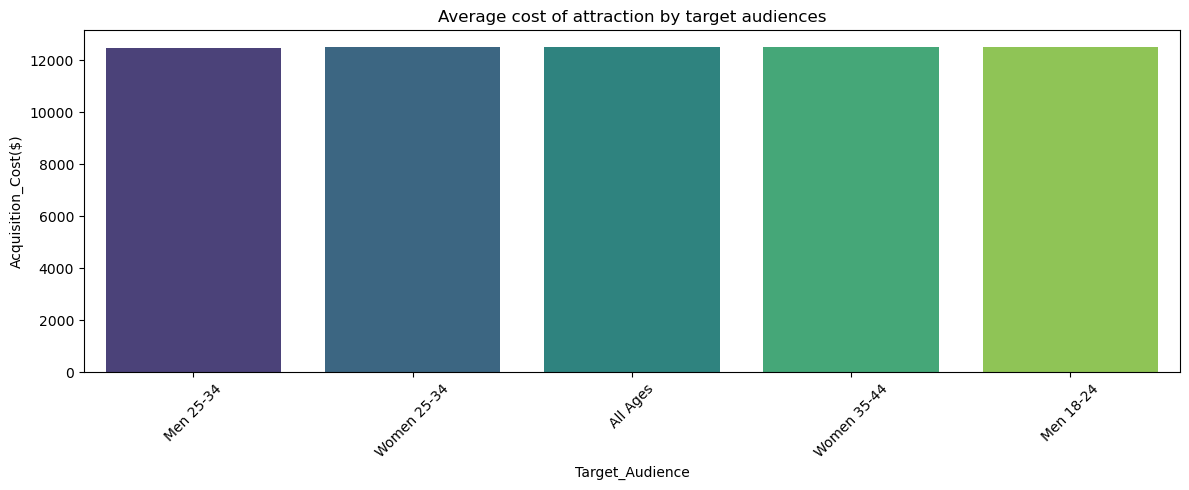

In [18]:
# Visualization
plt.figure(figsize=(12,5))
sns.barplot(x=audience_cost.index, y=audience_cost.values, palette='viridis')
plt.title('Average cost of attraction by target audiences')
plt.ylabel('Acquisition_Cost($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Additional significance testing via ANOVA
groups = [group['Acquisition_Cost($)'].dropna() for _, group in df.groupby('Target_Audience')]

f_stat, p_value = f_oneway(*groups)
print(f'ANOVA by Target_Audience: F = {f_stat:.2f}, p = {p_value:.4f}')

ANOVA by Target_Audience: F = 0.57, p = 0.6847


#### 6) Analysis of the time dynamics of advertising indicators.

- How CAC, ROI, conversions by channel and campaign change over time (weekly or monthly)?

In [20]:
# Grouping by months and channels
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_metrics = df.groupby(['Month', 'Channel_Used']).agg({'Acquisition_Cost($)':'mean',
                                                             'ROI': 'mean',
                                                             'Conversion_Rate': 'mean'}).reset_index()

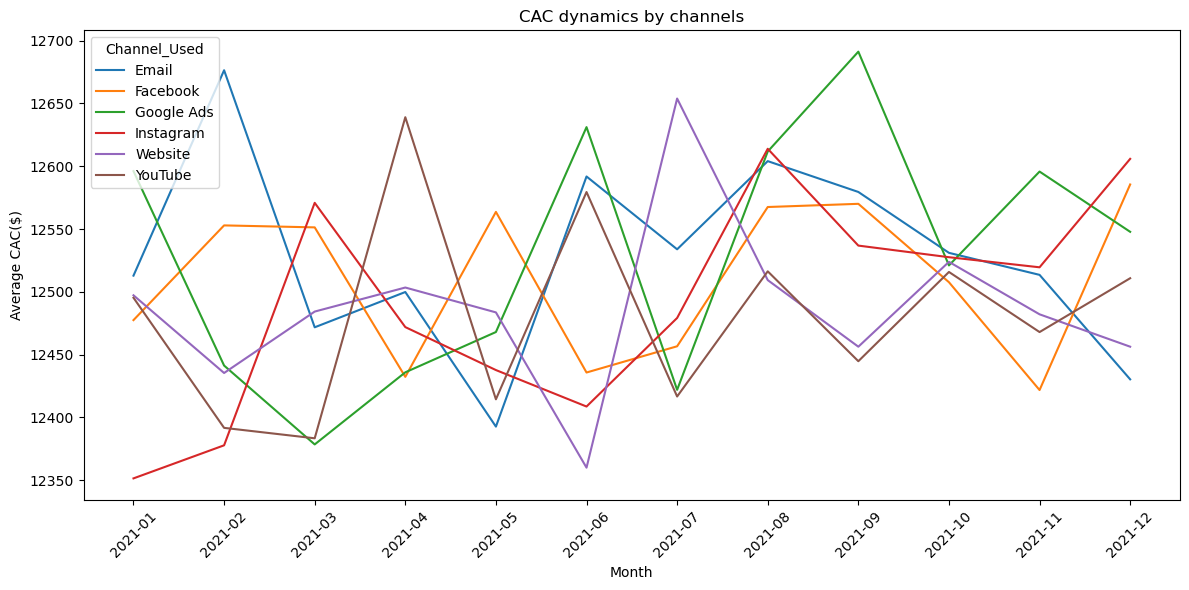

In [21]:
# Visualization CAC
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_metrics, x='Month', y='Acquisition_Cost($)', hue='Channel_Used')
plt.title('CAC dynamics by channels')
plt.ylabel('Average CAC($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

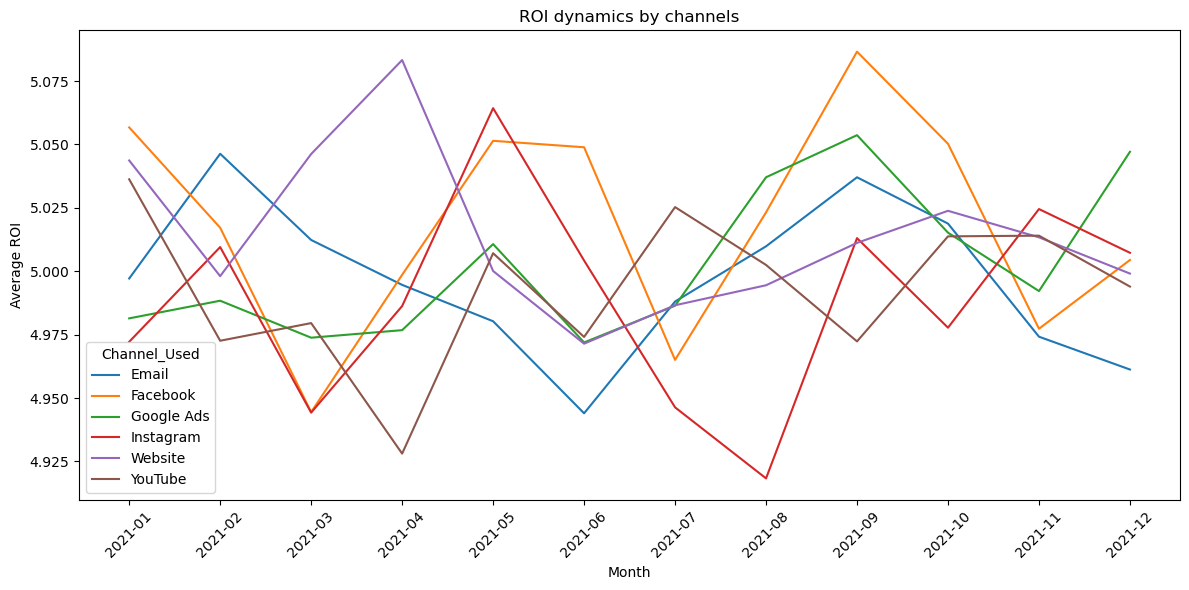

In [22]:
# Visualization ROI
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_metrics, x='Month', y='ROI', hue='Channel_Used')
plt.title('ROI dynamics by channels')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

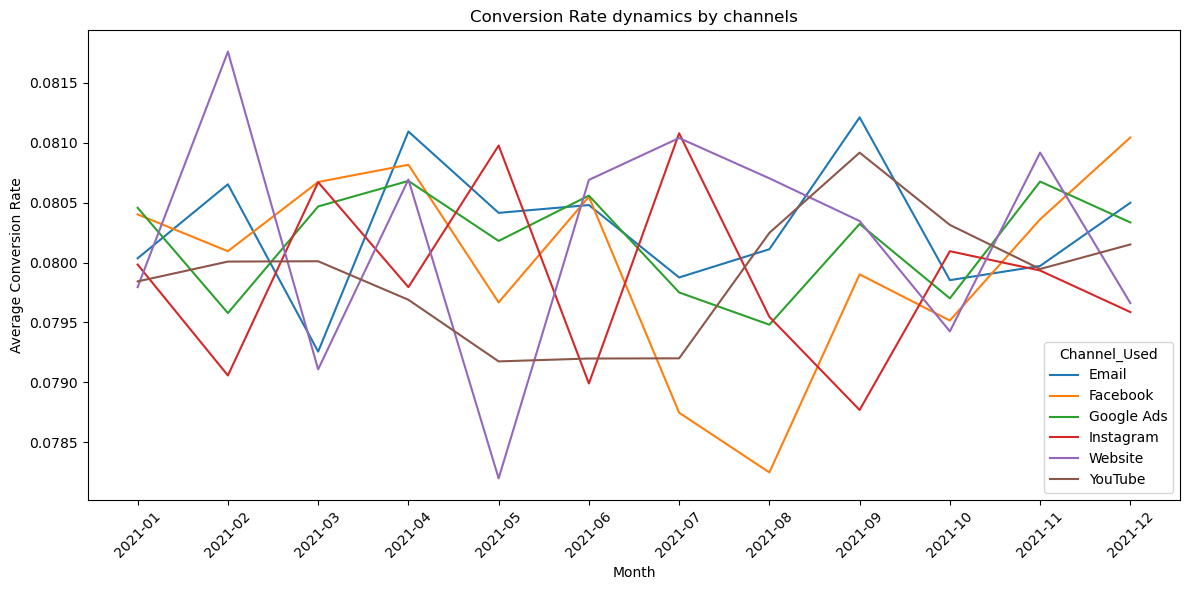

In [23]:
# Visualization Conversion Rate
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_metrics, x='Month', y='Conversion_Rate', hue='Channel_Used')
plt.title('Conversion Rate dynamics by channels')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Is there seasonality?

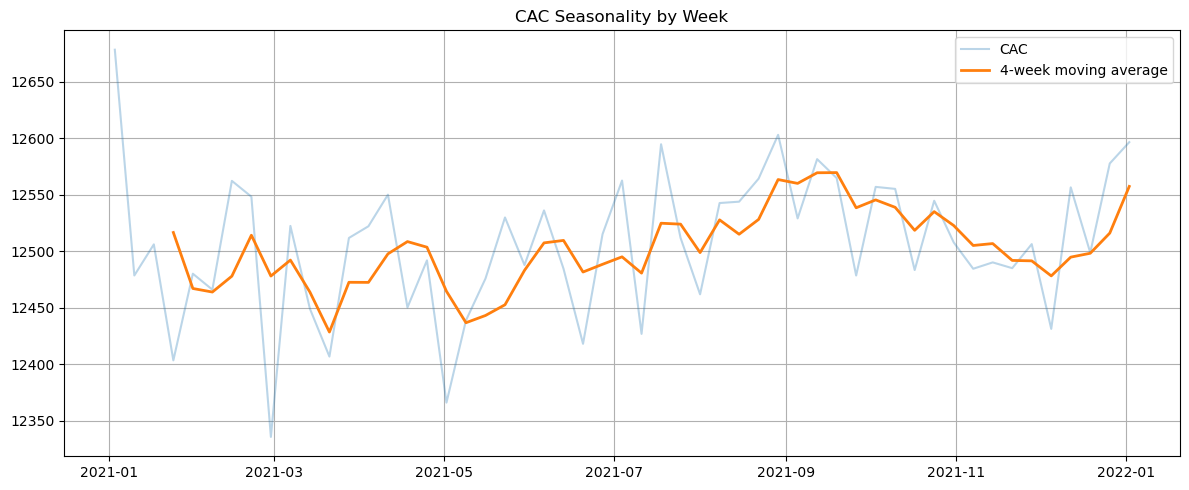

In [24]:
# Use moving average

df_1 = df.copy()
df_1.set_index('Date', inplace=True)
weekly = df_1.resample('W').agg({
    'ROI': 'mean',
    'Acquisition_Cost($)': 'mean',
    'Conversion_Rate': 'mean'
})

# CAC rolling
weekly['CAC_rolling'] = weekly['Acquisition_Cost($)'].rolling(4).mean()

plt.figure(figsize=(12,5))
plt.plot(weekly.index, weekly['Acquisition_Cost($)'], label='CAC', alpha=0.3)
plt.plot(weekly.index, weekly['CAC_rolling'], label='4-week moving average', linewidth=2)
plt.title('CAC Seasonality by Week')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

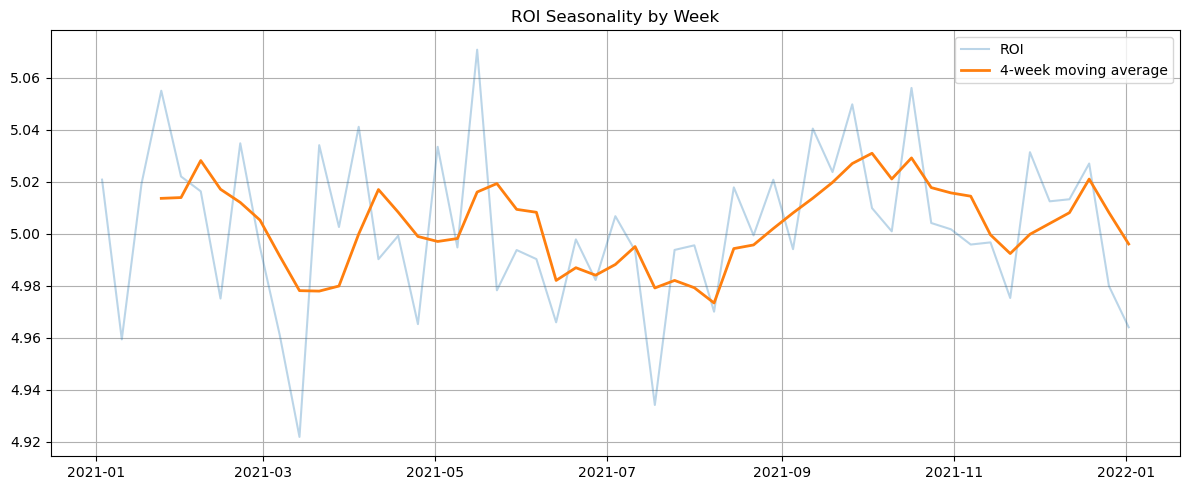

In [25]:
# ROI rolling
weekly['ROI_rolling'] = weekly['ROI'].rolling(4).mean()

plt.figure(figsize=(12,5))
plt.plot(weekly.index, weekly['ROI'], label='ROI', alpha=0.3)
plt.plot(weekly.index, weekly['ROI_rolling'], label='4-week moving average', linewidth=2)
plt.title('ROI Seasonality by Week')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

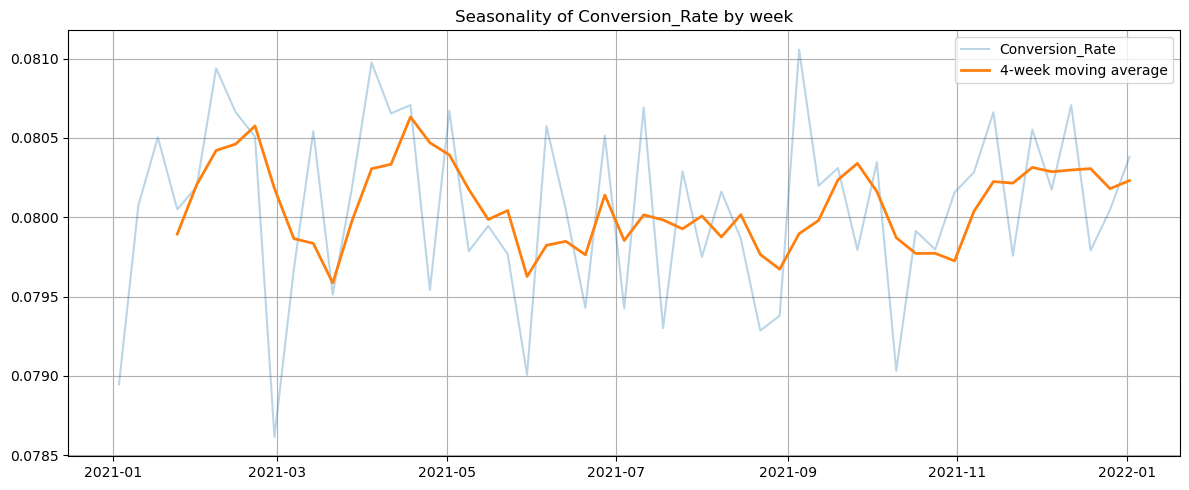

In [26]:
# Conversion Rate rolling
weekly['Conversion_Rate_rolling'] = weekly['Conversion_Rate'].rolling(4).mean()

plt.figure(figsize=(12,5))
plt.plot(weekly.index, weekly['Conversion_Rate'], label='Conversion_Rate', alpha=0.3)
plt.plot(weekly.index, weekly['Conversion_Rate_rolling'], label='4-week moving average', linewidth=2)
plt.title('Seasonality of Conversion_Rate by week')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8404\1038292484.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


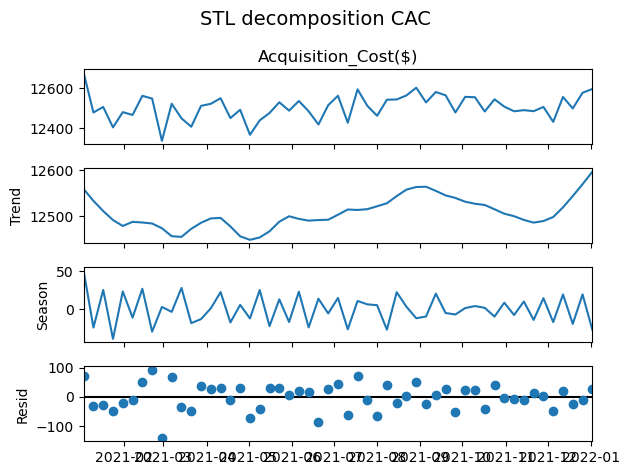

In [27]:
# STL decomposition (with trend and seasonality)
from statsmodels.tsa.seasonal import STL

# Parsing CAC
stl = STL(weekly['Acquisition_Cost($)'].dropna(), period=4)
res = stl.fit()
res.plot()
plt.suptitle('STL decomposition CAC', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8404\1561991826.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


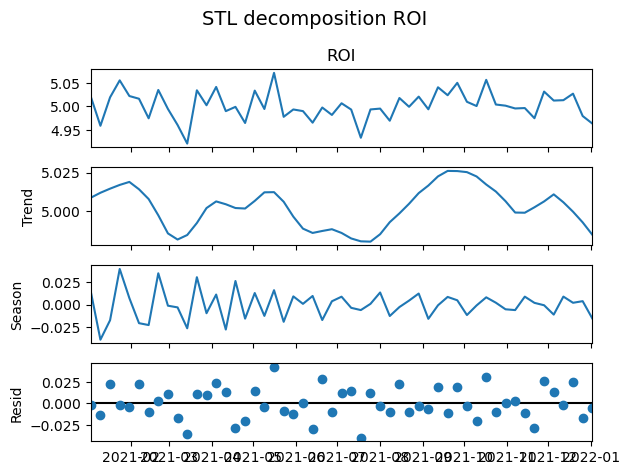

In [28]:
# Parsing ROI
stl = STL(weekly['ROI'].dropna(), period=4)
res = stl.fit()
res.plot()
plt.suptitle('STL decomposition ROI', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8404\2245500463.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


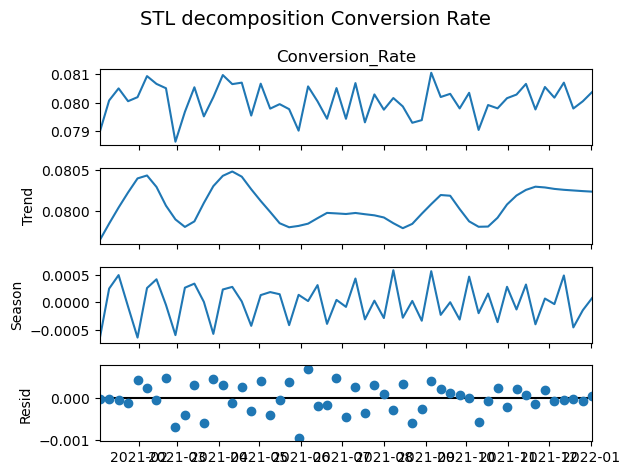

In [29]:
# Parsing Conversion Rate
stl = STL(weekly['Conversion_Rate'].dropna(), period=4)
res = stl.fit()
res.plot()
plt.suptitle('STL decomposition Conversion Rate', fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
# Using Linear Regression to Analyze the Overall Trend
from sklearn.linear_model import LinearRegression

weekly['Week_Num'] = np.arange(len(weekly))

# model: CAC-Time
X = weekly[['Week_Num']]
y = weekly['Acquisition_Cost($)']

model = LinearRegression()
model.fit(X,y)

print(f"Trend: Every week CAC {'is decreasing' if model.coef_[0] < 0 else 'growing'} on {abs(model.coef_[0]):.2f} $")

Trend: Every week CAC growing on 0.97 $


In [31]:
# model: ROI-Time
X = weekly[['Week_Num']]
y = weekly['ROI']

model = LinearRegression()
model.fit(X,y)

print(f"Trend: Every week ROI {'is decreasing' if model.coef_[0] < 0 else 'growing'} on {abs(model.coef_[0]):.2f} $")

Trend: Every week ROI growing on 0.00 $


In [32]:
# model: Conversion Rate-Time
X = weekly[['Week_Num']]
y = weekly['Conversion_Rate']

model = LinearRegression()
model.fit(X,y)

print(f"Trend: Every week Conversion Rate {'is decreasing' if model.coef_[0] < 0 else 'growing'} on {abs(model.coef_[0]):.2f} $")

Trend: Every week Conversion Rate growing on 0.00 $


#### 7) Segmenting campaigns by performance:
- Dividing campaigns into groups: “effective”, “average”, “ineffective” by KPI.

In [33]:
# Using KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

metrics = df[['ROI', 'Acquisition_Cost($)', 'Conversion_Rate']].dropna()

scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(metrics)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(metrics_scaled)

df['Campaign_Cluster'] = clusters

# Rename clusters based on average ROI
cluster_names = df.groupby('Campaign_Cluster')['ROI'].mean().sort_values(ascending=False).index.tolist()
name_mapping = {cluster_names[0]: 'Ineffective', cluster_names[1]: 'Average', cluster_names[2]: 'Effective'}
df['Campaign_Segment'] = df['Campaign_Cluster'].map(name_mapping)


In [37]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration(D),Channel_Used,Conversion_Rate,Acquisition_Cost($),ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Profit,Month,Campaign_Cluster,Campaign_Segment
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,101734.46,2021-01,2,Ineffective
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,64885.26,2021-01,1,Effective
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,73236.00,2021-01,0,Average
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,70618.20,2021-01,1,Effective
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,106938.00,2021-01,2,Ineffective


#### 8) Report and recommendations.

#### 1. Project goals
- Determining the most effective advertising channels.
- Calculating CAC, ROI and conversion rate for each channel.
- Studying seasonality and time dynamics of indicators.
- Analysis of campaign profitability and segmentation by effectiveness.

#### 2. Data
- Data sources: Data loaded from marketing_campaign_dataset.
- Data cleaning:
    - Removing missing values.
    - Transforming data formats (dates, column names and types).
    - Removing duplicates and outliers.

#### 3. Main results
##### 3.1 Analysis of used channels
    Average:
    
    Channels    CAC       ROI   Conversion Rate
    Email      12526.4   4.99    0.08
    Facebook   12510.9   5.01    0.08
    Google Ads 12528.0   5.00    0.08
    Instagram  12491.8   4.99    0.08
    Website    12487.8   5.01    0.08
    YouTube    12481.4   4.99    0.08

##### 3.2 Top 10 Most Profitable Campaigns
    Campaign_ID  Campaign_Type    Profit
    13019        Influencer       159456.36
    33606        Email            159368.58
    72530        Display          159360.00
    13708        Display          159352.62
    73095        Influencer       159352.18
    8281         Social Media     159328.68
    163709       Display          159248.69
    11708        Display          159073.32
    172561       Search           158809.96
    70216        Influencer       158672.96

##### 3.3 A/B testing
    Result: Campaign_Type: F = 0.41, p = 0.8031
            Channel_Used: F = 1.53, p = 0.1776
    There is no difference in profitability between campaigns and channels.

##### 3.4 Impact of target audience on acquasation cost
The graph and the result of the test ANOVA (Target_Audience: F = 0.57, p = 0.6847) show that there is no difference in the influence of the target audience on CAC.

#### 4. Dynamics of indicators

##### 4.1 Time dynamics of advertising channel indicators
- CAC: Gradual increase since June.
- ROI: Seasonal growth in April and August to December.
- Conversion Rate: Fall in April and rise from August (probably during holiday periods).

##### 4.2 Seasonality
- CAC: There has been a gradual increase since May. Trend: up (0.97)
- ROI and Conversion Rate: No significant growth is observed. Trend: (0.00)

#### 5. Campaign Segmentation
- By campaign type, Effective campaigns are 15.3% more effective than Average campaigns and 18.2% more effective than Ineffective campaigns. All companies have similar results.

#### 6. Recommendations
- Focus budget across all channels during holiday periods for maximum ROI.
- Increase your use of video ads on Facebook and YouTube.
- Segment the target audience and develop individual strategies for young people and older generations.
- Reduce investment in used channels if CAC remains high.
- Monitor the dynamics of indicators monthly to identify new trends.

#### 7. Conclusion
Key insights will help you optimize your advertising costs and increase campaign profitability. It is recommended to continue regular monitoring of metrics and testing new strategies.

In [38]:
# Metrics for Looker Studio
# type Date 
#df['Month'] = pd.to_datetime(df['Month'])

# New columns: 
# CPA
#df['CPA'] = df['Acquisition_Cost($)'] / (df['Clicks'] * df['Conversion_Rate'])

# CPM
#df['CPM'] = df['Acquisition_Cost($)'] / (df['Impressions'] / 1000)

# CTR
#df['CTR'] = df['Clicks'] / df['Impressions']

# ROI Category (for segmentation)
#df['ROI_Category'] = pd.cut(df['ROI'], bins=[0,2,4,6,8,10], labels=['Very Low', 'Low','Medium','High','Very High'])

# Campaign_Efficiency (according to ROI and CAC)
#df['Efficiency'] = df.apply(lambda row: 'Efficient' if row['ROI'] > 5 and row['Acquisition_Cost($)'] < 10000 else 'Needs Review', axis=1)

In [39]:
#df.to_csv("№4_analysis_campaigns_LS1.csv", index=False)